In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
os.getcwd()
os.listdir()
df = pd.read_csv('compiled primer runs 2 to 5.csv')
df.head(20)

,Run,Amp,Conc,CT,Quantity
0,1,Amp1,1ng/ul,12.162,1000.0
1,1,Amp1,100pg/ul,15.335,100.0
2,1,Amp1,10pg/ul,18.688,10.0
3,1,Amp1,1pg/ul,22.037,1.0
4,1,Amp1,100fg/ul,25.357,0.1
5,1,Amp1,NTC,0.000,0.0
6,1,Amp2,1ng/ul,12.368,1000.0
7,1,Amp2,100pg/ul,15.536,100.0
8,1,Amp2,10pg/ul,18.903,10.0
9,1,Amp2,1pg/ul,22.237,1.0


In [3]:
df[df['Quantity'].isna()]

,Run,Amp,Conc,CT,Quantity
71,2,Amp1,NTC,37.659,NaN
83,2,Amp4,NTC,35.764,NaN


In [4]:
df['Quantity'] = df['Quantity'].fillna(0)

In [5]:
df.isna().sum()
# no more na values

Run         0
Amp         0
Conc        0
CT          0
Quantity    0
dtype: int64

In [6]:
df_no_ntc = df[(df['Conc'] != 'NTC') ]

In [7]:
df_no_ntc.head(10)

,Run,Amp,Conc,CT,Quantity
0,1,Amp1,1ng/ul,12.162,1000.0
1,1,Amp1,100pg/ul,15.335,100.0
2,1,Amp1,10pg/ul,18.688,10.0
3,1,Amp1,1pg/ul,22.037,1.0
4,1,Amp1,100fg/ul,25.357,0.1
6,1,Amp2,1ng/ul,12.368,1000.0
7,1,Amp2,100pg/ul,15.536,100.0
8,1,Amp2,10pg/ul,18.903,10.0
9,1,Amp2,1pg/ul,22.237,1.0
10,1,Amp2,100fg/ul,25.537,0.1


In [8]:
df_no_ntc['Quantity'] = np.log10(df_no_ntc['Quantity'])

<ipython-input-8-8d82a81e9f53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_ntc['Quantity'] = np.log10(df_no_ntc['Quantity'])


In [9]:
df_no_ntc

,Run,Amp,Conc,CT,Quantity
0,1,Amp1,1ng/ul,12.162,3.0
1,1,Amp1,100pg/ul,15.335,2.0
2,1,Amp1,10pg/ul,18.688,1.0
3,1,Amp1,1pg/ul,22.037,0.0
4,1,Amp1,100fg/ul,25.357,-1.0
...,...,...,...,...,...
233,4,Amp10,10pg/ul,18.896,1.0
234,4,Amp10,1pg/ul,22.586,0.0
235,4,Amp10,1pg/ul,22.633,0.0
236,4,Amp10,100fg/ul,26.324,-1.0


In [10]:
# loop method to generate a dictionary of the DataFrame for each 'Amp'
# see 'manual filtering for Amp' step
# since we have Amp1,4,5,9, and 10, we cannot just use 'for amp in range()', because
# it will return us the values in chronological order. What we want is in the specific order
# of '1,4,5,9,10'

# so over here, we are creating

dict_amp = {}
for amp in [1,4,5,9,10]:
#range(0,len(df_withoutzero_quant_5amp['Amp'].unique())):
    print(amp)
    dict_amp['Amp'+str(amp)] = df_no_ntc[df_no_ntc['Amp']==('Amp'+str(amp))]

dict_amp['Amp4']

1
4
5
9
10


,Run,Amp,Conc,CT,Quantity
18,1,Amp4,1ng/ul,11.855,3.0
19,1,Amp4,100pg/ul,15.052,2.0
20,1,Amp4,10pg/ul,18.400,1.0
21,1,Amp4,1pg/ul,21.730,0.0
22,1,Amp4,100fg/ul,25.188,-1.0
72,2,Amp4,1ng/ul,12.275,3.0
73,2,Amp4,1ng/ul,12.147,3.0
74,2,Amp4,100pg/ul,15.239,2.0
75,2,Amp4,100pg/ul,15.242,2.0
76,2,Amp4,10pg/ul,18.957,1.0


In [11]:
def get_stats(dict_amp):
    slope, intercept, r_value, p_value, std_err = stats.linregress(
    dict_amp.groupby(by=['Quantity']).mean().index,
    dict_amp.groupby(by=['Quantity']).mean()['CT'])
    stats_list.append([slope, intercept, r_value, p_value, std_err])

In [12]:
stats_list = []
index_names = []
for amp in [1,4,5,9,10]:
    print('Amp'+str(amp))
    get_stats(dict_amp['Amp'+str(amp)])
    index_names.append('Amp'+str(amp))

Amp1
Amp4
Amp5
Amp9
Amp10


In [13]:
stats_list

[[-3.392985714285713,
  22.4627,
  -0.9999228940632333,
  8.127567051549782e-07,
  0.024327945074829858],
 [-3.411242857142857,
  22.184985714285713,
  -0.9998062862487941,
  3.2363979280274415e-06,
  0.03877129785569418],
 [-3.317128571428572,
  21.967385714285715,
  -0.9999240989867775,
  7.937802206782868e-07,
  0.023597456048724215],
 [-3.395942857142858,
  22.56245714285714,
  -0.9998312091885619,
  2.6323647277712384e-06,
  0.036028329745034574],
 [-3.481299999999999,
  22.691985714285714,
  -0.9998627247132719,
  1.930694030395593e-06,
  0.03330709205188529]]

In [14]:
index_names

['Amp1', 'Amp4', 'Amp5', 'Amp9', 'Amp10']

In [15]:
reg_stats = pd.DataFrame(stats_list,index = index_names,
             columns = ['slope','intercept','r_value', 'p_value', 'std_err'])

In [16]:
# looping code ends here

reg_stats
# note that the R-squared value is negative. this is dependent on the slope, if it is negative, the R-squared
# will be negative. this does not mean that the regression line does not fit and is less
# accurate than the average

,slope,intercept,r_value,p_value,std_err
Amp1,-3.392986,22.462700,-0.999923,8.127567e-07,0.024328
Amp4,-3.411243,22.184986,-0.999806,3.236398e-06,0.038771
Amp5,-3.317129,21.967386,-0.999924,7.937802e-07,0.023597
Amp9,-3.395943,22.562457,-0.999831,2.632365e-06,0.036028
Amp10,-3.481300,22.691986,-0.999863,1.930694e-06,0.033307


In [17]:
# again we have to create a dictionary to carry our for loops with vhanging variable name
dict_for_amp = {}
for n in [1,4,5,9,10]:
    dict_for_amp['Amp'+str(n)] = dict_amp['Amp'+str(n)]
    print('Amp'+str(n))
    print(dict_for_amp['Amp'+str(n)])

Amp1
     Run   Amp      Conc      CT  Quantity
0      1  Amp1    1ng/ul  12.162       3.0
1      1  Amp1  100pg/ul  15.335       2.0
2      1  Amp1   10pg/ul  18.688       1.0
3      1  Amp1    1pg/ul  22.037       0.0
4      1  Amp1  100fg/ul  25.357      -1.0
60     2  Amp1    1ng/ul  12.340       3.0
61     2  Amp1    1ng/ul  12.267       3.0
62     2  Amp1  100pg/ul  15.727       2.0
63     2  Amp1  100pg/ul  15.613       2.0
64     2  Amp1   10pg/ul  19.138       1.0
65     2  Amp1   10pg/ul  19.213       1.0
66     2  Amp1    1pg/ul  22.276       0.0
67     2  Amp1    1pg/ul  22.394       0.0
68     2  Amp1  100fg/ul  25.425      -1.0
69     2  Amp1  100fg/ul  25.589      -1.0
120    3  Amp1    1ng/ul  12.357       3.0
121    3  Amp1    1ng/ul  12.286       3.0
122    3  Amp1  100pg/ul  15.710       2.0
123    3  Amp1  100pg/ul  15.664       2.0
124    3  Amp1   10pg/ul  19.689       1.0
125    3  Amp1   10pg/ul  19.697       1.0
126    3  Amp1    1pg/ul  22.675       0.0
127   

i value is 1
0
ax value is AxesSubplot(0.125,0.749828;0.775x0.130172)
i value is 4
1
ax value is AxesSubplot(0.125,0.593621;0.775x0.130172)
i value is 5
2
ax value is AxesSubplot(0.125,0.437414;0.775x0.130172)
i value is 9
3
ax value is AxesSubplot(0.125,0.281207;0.775x0.130172)
i value is 10
4
ax value is AxesSubplot(0.125,0.125;0.775x0.130172)


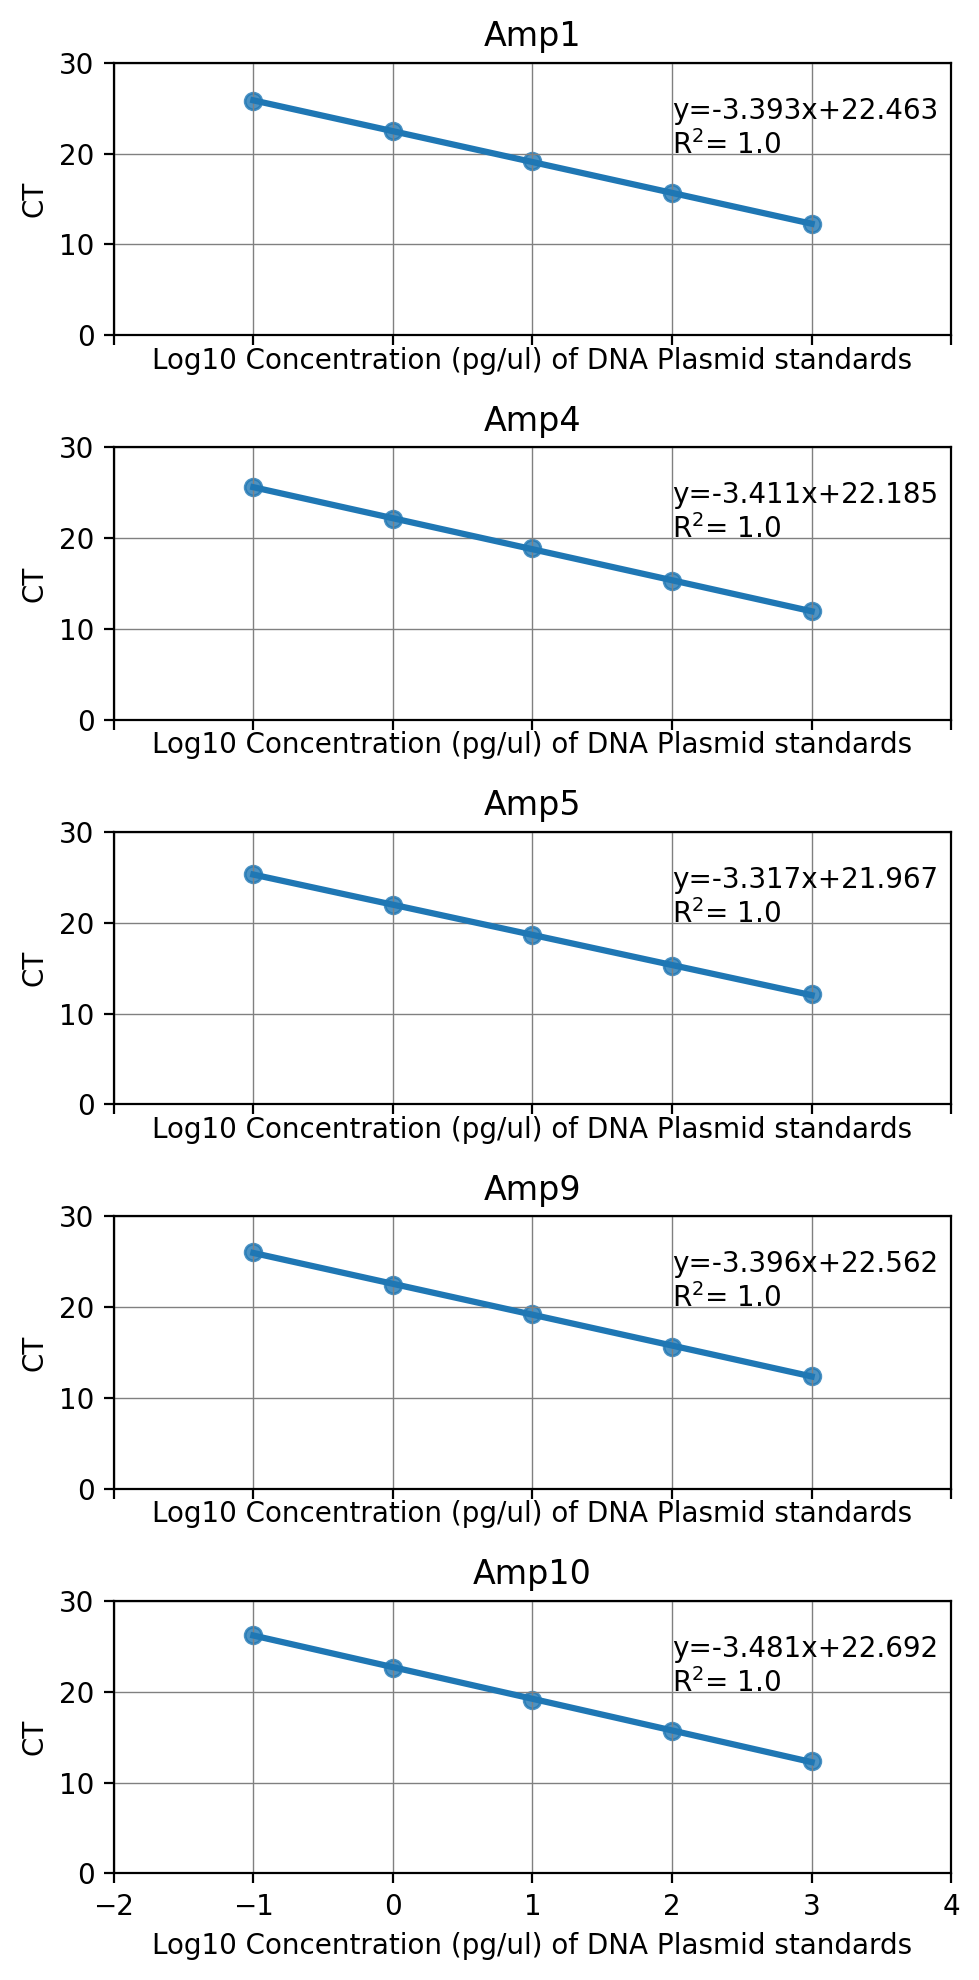

In [18]:
## testing plots with subplots with loop # works!!!! # so this is being used
#fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,
#                                                    figsize=(10,8),
#                                                    #dpi=300,
#                                                    #tight_layout=True,
#                                                    sharex=True)

# defining a subplot object with 5 rows and 1 column; enabled tight_layout to ensure axes appear properly
fig, axs = plt.subplots(nrows=5,ncols=1,figsize=(5,10),sharex=True,tight_layout=True,dpi=200)



# loop to create the plots
## here we are passing in 3 things to the for loop: the flattened array of the axs 'ax',
## the index 'n' and the Amplicon value 'i'. and we zip them up. note that since axs.revel() returns too many
## values, we have to define a 'sub-tuple' called (n,i)
for ax,(n,i) in zip(axs.ravel(),enumerate([1,4,5,9,10])):
    print('i value is '+ str(i)) # check
    print(n) # check
    print('ax value is ' +str(ax)) # check
    
    # creating the plot
    sns.regplot(data='Amp'+str(i),
           x=dict_for_amp['Amp'+str(i)].groupby(by='Quantity').mean().index,
           y=dict_for_amp['Amp'+str(i)].groupby(by='Quantity').mean()['CT'],
            ax=ax # defining the axes of the plot to the ax value that we zipped
          )
    # setting the title
    ax.set_title('Amp'+str(i))

    # showing the grid line
    ax.grid(which='major',
         axis='both',
        color='grey',
         linestyle='-',
         linewidth=0.5)
    
    # showing the regresion statistics
    ax.annotate("y={}x+{}\nR$^2$= {}".format(reg_stats['slope'][n].round(decimals=3),
                                         reg_stats['intercept'][n].round(decimals=3),
                                         -1 * reg_stats['r_value'][n].round(decimals=3)
                                        ),
             xy=(2,20)
            )
    
    # setting the axes limits
    plt.setp(ax,
             xlim = (-2,4),
             ylim= (0,30)
        )
    
    # setting the x label for all the graphs
    ax.set_xlabel('Log10 Concentration (pg/ul) of DNA Plasmid standards')

# saving the plot
#plt.savefig('compiledPlots.png')

In [19]:
df_no_ntc

,Run,Amp,Conc,CT,Quantity
0,1,Amp1,1ng/ul,12.162,3.0
1,1,Amp1,100pg/ul,15.335,2.0
2,1,Amp1,10pg/ul,18.688,1.0
3,1,Amp1,1pg/ul,22.037,0.0
4,1,Amp1,100fg/ul,25.357,-1.0
...,...,...,...,...,...
233,4,Amp10,10pg/ul,18.896,1.0
234,4,Amp10,1pg/ul,22.586,0.0
235,4,Amp10,1pg/ul,22.633,0.0
236,4,Amp10,100fg/ul,26.324,-1.0


In [35]:
df_no_ntc_145910 = df_no_ntc.groupby(by=['Amp','Quantity']).mean().loc[['Amp1','Amp4','Amp5','Amp9','Amp10']]

In [38]:
df_no_ntc_145910 = df_no_ntc_145910.drop('Run',axis = 1)

In [39]:
df_no_ntc_145910

CT
Amp   Quantity           
Amp1  -1.0      25.826571
       0.0      22.443286
       1.0      19.185000
       2.0      15.620857
       3.0      12.272857
Amp4  -1.0      25.633429
       0.0      22.072857
       1.0      18.916857
       2.0      15.263857
       3.0      11.981714
Amp5  -1.0      25.323286
       0.0      21.960571
       1.0      18.628143
       2.0      15.242714
       3.0      12.096571
Amp9  -1.0      26.039571
       0.0      22.475143
       1.0      19.195143
       2.0      15.650571
       3.0      12.472143
Amp10 -1.0      26.271000
       0.0      22.635429
       1.0      19.132000
       2.0      15.665571
       3.0      12.349429

In [46]:
amps = df_no_ntc_145910.index.get_level_values(0).unique()

In [51]:
amps

Index(['Amp1', 'Amp4', 'Amp5', 'Amp9', 'Amp10'], dtype='object', name='Amp')

In [54]:
amps[0]

'Amp1'

In [61]:
len(amps)

5

In [42]:
# block to extract the Amp number starts here

import re

In [62]:
amp_num = []
for n in range(0,len(amps)):
    print(n)
    amp_num.append((re.findall(r'Amp(\w+)', amps[n]) or None)[0])

0
1
2
3
4


In [63]:
# block to extract the Amp number ends here 
# checking
amp_num

['1', '4', '5', '9', '10']

In [41]:
amps

Index(['Amp1', 'Amp4', 'Amp5', 'Amp9', 'Amp10'], dtype='object', name='Amp')

In [72]:
dict_for_amp['Amp1'].groupby(by=['Amp','Quantity']).mean()

Run         CT
Amp  Quantity                     
Amp1 -1.0      2.714286  25.826571
      0.0      2.714286  22.443286
      1.0      2.714286  19.185000
      2.0      2.714286  15.620857
      3.0      2.714286  12.272857

In [69]:
df_no_ntc_145910.loc['Amp1']

,CT
Quantity,
-1.0,25.826571
0.0,22.443286
1.0,19.185000
2.0,15.620857
3.0,12.272857


In [83]:
# loop to create a dictionary for each amp according to its name as the value
dict_amp = {}
for amp in amp_num:
    print(str(amp))
    dict_amp['Amp'+str(amp)] = df_no_ntc_145910.loc[df_no_ntc_145910.index.get_level_values(0) == ('Amp'+str(amp))]
    print(dict_amp['Amp'+str(amp)])

1
                      CT
Amp  Quantity           
Amp1 -1.0      25.826571
      0.0      22.443286
      1.0      19.185000
      2.0      15.620857
      3.0      12.272857
4
                      CT
Amp  Quantity           
Amp4 -1.0      25.633429
      0.0      22.072857
      1.0      18.916857
      2.0      15.263857
      3.0      11.981714
5
                      CT
Amp  Quantity           
Amp5 -1.0      25.323286
      0.0      21.960571
      1.0      18.628143
      2.0      15.242714
      3.0      12.096571
9
                      CT
Amp  Quantity           
Amp9 -1.0      26.039571
      0.0      22.475143
      1.0      19.195143
      2.0      15.650571
      3.0      12.472143
10
                       CT
Amp   Quantity           
Amp10 -1.0      26.271000
       0.0      22.635429
       1.0      19.132000
       2.0      15.665571
       3.0      12.349429


In [91]:
dict_amp['Amp1']

CT  CI
Amp  Quantity               
Amp1 -1.0      25.826571   1
      0.0      22.443286   1
      1.0      19.185000   1
      2.0      15.620857   1
      3.0      12.272857   1

CT
Amp   Quantity           
Amp1  -1.0      25.826571
       0.0      22.443286
       1.0      19.185000
       2.0      15.620857
       3.0      12.272857
Amp4  -1.0      25.633429
       0.0      22.072857
       1.0      18.916857
       2.0      15.263857
       3.0      11.981714
Amp5  -1.0      25.323286
       0.0      21.960571
       1.0      18.628143
       2.0      15.242714
       3.0      12.096571
Amp9  -1.0      26.039571
       0.0      22.475143
       1.0      19.195143
       2.0      15.650571
       3.0      12.472143
Amp10 -1.0      26.271000
       0.0      22.635429
       1.0      19.132000
       2.0      15.665571
       3.0      12.349429

In [109]:
df_no_ntc

,Run,Amp,Conc,CT,Quantity
0,1,Amp1,1ng/ul,12.162,3.0
1,1,Amp1,100pg/ul,15.335,2.0
2,1,Amp1,10pg/ul,18.688,1.0
3,1,Amp1,1pg/ul,22.037,0.0
4,1,Amp1,100fg/ul,25.357,-1.0
...,...,...,...,...,...
233,4,Amp10,10pg/ul,18.896,1.0
234,4,Amp10,1pg/ul,22.586,0.0
235,4,Amp10,1pg/ul,22.633,0.0
236,4,Amp10,100fg/ul,26.324,-1.0


In [120]:
df_no_ntc[(df_no_ntc['Amp'] == 'Amp1') & (df_no_ntc['Quantity'] == 1)]

,Run,Amp,Conc,CT,Quantity
2,1,Amp1,10pg/ul,18.688,1.0
64,2,Amp1,10pg/ul,19.138,1.0
65,2,Amp1,10pg/ul,19.213,1.0
124,3,Amp1,10pg/ul,19.689,1.0
125,3,Amp1,10pg/ul,19.697,1.0
184,4,Amp1,10pg/ul,18.949,1.0
185,4,Amp1,10pg/ul,18.921,1.0


In [118]:
dict_amp['Amp1']['CT']

Amp   Quantity
Amp1  -1.0        25.826571
       0.0        22.443286
       1.0        19.185000
       2.0        15.620857
       3.0        12.272857
Name: CT, dtype: float64

In [135]:
# testing the stats.t.interval code here
stats.t.interval(alpha=0.95, df=(7-1),
                 loc=np.mean([18.688,19.138,19.213,19.689,19.697,18.949,18.921]),
                 scale=stats.sem([18.688,19.138,19.213,19.689,19.697,18.949,18.921])
                )

# note that the 95% CI does not correspond to that found in Excel

(18.828493456781896, 19.54150654321811)

In [124]:
stats.t.interval(alpha=0.95, df=(7-1),
                 loc=np.mean(df_no_ntc[(df_no_ntc['Amp'] == 'Amp1') & (df_no_ntc['Quantity'] == 1)]['CT']),
                 scale=stats.sem(df_no_ntc[(df_no_ntc['Amp'] == 'Amp1') & (df_no_ntc['Quantity'] == 1)]['CT'])
                ) 

(18.828493456781896, 19.54150654321811)

In [159]:
# loop to create a list of all the 95% CI

ci95_list = []

# first loop to loop through all the Amp
for amp in amp_num:
    print('Amp'+str(amp))
    
    # nested loop to loop through all the quantity within each Amp
    for qty in (-1,0,1,2,3):
        print(qty) # test to see if the looping sequence is correct
        
        # this is the code to create the interval using student's t
        ci95 = stats.t.interval(alpha=0.95, df=(7-1),
                                
                                # loc is the mean; what we are doing here to t get the mean of each Amp and each Quantity where 
                                # Amp is 1,4,5,9 and 10 and Quantity is from -1 to 3
                                # note that we pass in the raw values that we want to calculate the mean for and not the actual mean value
                                loc=np.mean(df_no_ntc[(df_no_ntc['Amp'] == ('Amp'+str(amp))) & (df_no_ntc['Quantity'] == qty)]['CT']),
                                
                                # scale is the SD the values passed in is the same as loc
                                scale=stats.sem(df_no_ntc[(df_no_ntc['Amp'] == ('Amp'+str(amp))) & (df_no_ntc['Quantity'] == qty)]['CT'])
                               )
        ci95_list.append(ci95)

Amp1
-1
0
1
2
3
Amp4
-1
0
1
2
3
Amp5
-1
0
1
2
3
Amp9
-1
0
1
2
3
Amp10
-1
0
1
2
3


In [168]:
# check; should be the CI for Amp1 from Quantity of -1 to 3
ci95_list[0:5]

[(25.459178329685535, 26.19396452745731),
 (22.222383889551423, 22.664187539020006),
 (18.828493456781896, 19.54150654321811),
 (15.498838909112031, 15.742875376602253),
 (12.195000677332203, 12.350713608382087)]

In [175]:
ci95_list = np.round(ci95_list, decimals=2)

In [182]:
# this is how you list unpack and define two new columns of data to an existing dataframe
df_no_ntc_145910[['CI_lower','CI_upper']] = ci95_list

In [185]:
df_no_ntc_145910.drop('CI',axis=1)

CT  CI_lower  CI_upper
Amp   Quantity                               
Amp1  -1.0      25.826571     25.46     26.19
       0.0      22.443286     22.22     22.66
       1.0      19.185000     18.83     19.54
       2.0      15.620857     15.50     15.74
       3.0      12.272857     12.20     12.35
Amp4  -1.0      25.633429     25.12     26.15
       0.0      22.072857     21.85     22.30
       1.0      18.916857     18.58     19.25
       2.0      15.263857     15.14     15.39
       3.0      11.981714     11.82     12.14
Amp5  -1.0      25.323286     24.82     25.83
       0.0      21.960571     21.80     22.12
       1.0      18.628143     18.54     18.71
       2.0      15.242714     15.09     15.39
       3.0      12.096571     11.90     12.29
Amp9  -1.0      26.039571     25.68     26.40
       0.0      22.475143     22.32     22.63
       1.0      19.195143     19.01     19.38
       2.0      15.650571     15.54     15.76
       3.0      12.472143     12.36     12.58
Amp10 -1.0      26.271000     25.93     26.61
       0.0      22.635429     22.37     22.90
       1.0      19.132000     18.89     19.37
       2.0      15.665571     15.52     15.81
       3.0      12.349429     12.17     12.53